In [1]:
import pandas as pd

file_path = r"C:\Users\user\OneDrive\Homeworks\AI\heart.xlsx"
df = pd.read_excel(file_path)

df['Age'] = df['Age'] / 100

df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

chest_pain_map = {'ASY': 0, 'ATA': 1, 'NAP': 2, 'TA': 3}
df['ChestPainType'] = df['ChestPainType'].map(chest_pain_map)

df['RestingBP'] = df['RestingBP'] / 300
df['Cholesterol'] = df['Cholesterol'] / 1000
df['MaxHR'] = df['MaxHR'] / 300

df['RestingECG'] = df['RestingECG'].map({'LVH': 0, 'Normal': 1, 'ST': 2})
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ST_Slope'] = df['ST_Slope'].map({'Down': 0, 'Flat': 1, 'Up': 2})

# Save to Excel
df.to_excel(r"C:\Users\user\OneDrive\Homeworks\AI\new_heart.xlsx", index=False)


Correlation Matrix:
                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000 -0.055750      -0.077150   0.254399    -0.095282   
Sex            -0.055750  1.000000       0.126559  -0.005133     0.200092   
ChestPainType  -0.077150  0.126559       1.000000  -0.020647     0.067880   
RestingBP       0.254399 -0.005133      -0.020647   1.000000     0.100893   
Cholesterol    -0.095282  0.200092       0.067880   0.100893     1.000000   
FastingBS       0.198039 -0.120076      -0.073151   0.070193    -0.260974   
RestingECG     -0.007484 -0.071552      -0.072537   0.022656    -0.196544   
MaxHR          -0.382045  0.189186       0.289123  -0.112135     0.235792   
ExerciseAngina  0.215793 -0.190664      -0.354727   0.155101    -0.034166   
Oldpeak         0.258612 -0.105734      -0.177377   0.164803     0.050148   
ST_Slope       -0.268264  0.150693       0.213521  -0.075162     0.111471   
HeartDisease    0.282039 -0.305445      -0.386828   0.10

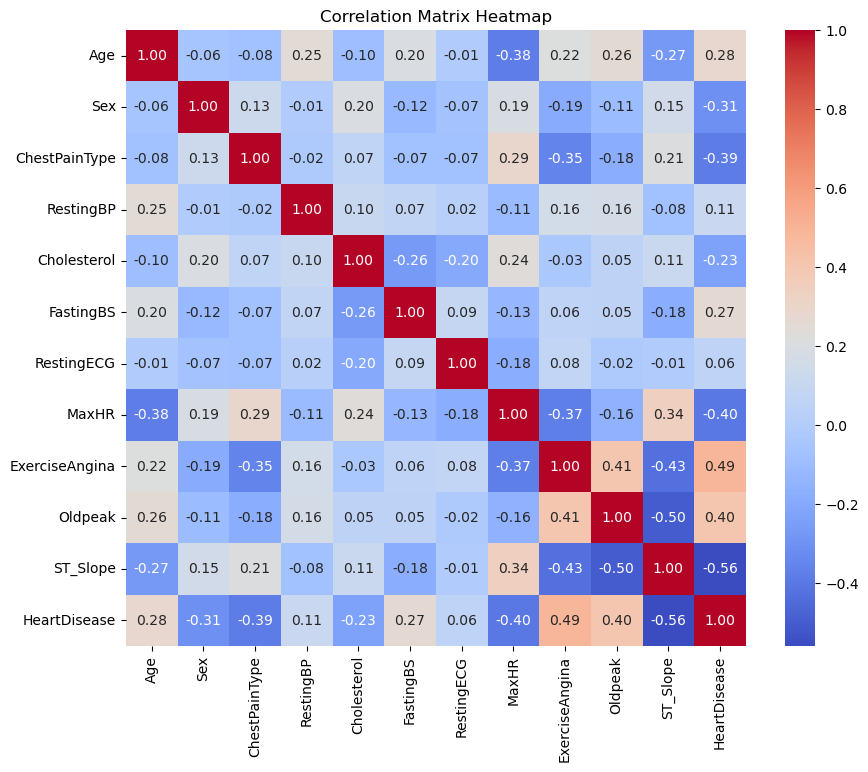

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\new_heart.xlsx"
df = pd.read_excel(file_path)

# Calculate correlation matrix
corr_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [3]:
import pandas as pd

# File path
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\new_heart.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Shape before cleaning
print("Before cleaning:", df.shape)

# ---- Outlier handling ----
# RestingBP: remove 0 or negative values
df = df[df["RestingBP"] > 0]

# Cholesterol: remove 0 or negative values
df = df[df["Cholesterol"] > 0]

# Oldpeak: remove negative values
df = df[df["Oldpeak"] >= 0]

# Shape after cleaning
print("After cleaning:", df.shape)

# Preview cleaned data
print(df[["RestingBP", "Cholesterol", "Oldpeak"]].describe())

# ---- Save to new Excel file ----
output_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"
df.to_excel(output_path, index=False)

print(f"Cleaned dataset saved to: {output_path}")


Before cleaning: (918, 12)
After cleaning: (745, 12)
        RestingBP  Cholesterol     Oldpeak
count  745.000000   745.000000  745.000000
mean     0.443454     0.244748    0.902953
std      0.057635     0.059114    1.072953
min      0.306667     0.085000    0.000000
25%      0.400000     0.208000    0.000000
50%      0.433333     0.237000    0.500000
75%      0.466667     0.275000    1.500000
max      0.666667     0.603000    6.200000
Cleaned dataset saved to: C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx


Correlation Matrix:
                     Age       Sex  ChestPainType  RestingBP  Cholesterol  \
Age             1.000000 -0.042462      -0.080330   0.259074     0.055390   
Sex            -0.042462  1.000000       0.121779  -0.034821     0.106132   
ChestPainType  -0.080330  0.121779       1.000000  -0.033163    -0.100579   
RestingBP       0.259074 -0.034821      -0.033163   1.000000     0.094986   
Cholesterol     0.055390  0.106132      -0.100579   0.094986     1.000000   
FastingBS       0.240810 -0.096451       0.000504   0.173478     0.053239   
RestingECG     -0.051365 -0.041094      -0.049746   0.037059    -0.067552   
MaxHR          -0.381774  0.157462       0.303445  -0.125419    -0.018895   
ExerciseAngina  0.244595 -0.193305      -0.394090   0.160523     0.085417   
Oldpeak         0.284489 -0.126557      -0.218586   0.198008     0.056824   
ST_Slope       -0.283789  0.143685       0.237254  -0.143238    -0.076795   
HeartDisease    0.297092 -0.293751      -0.394854   0.17

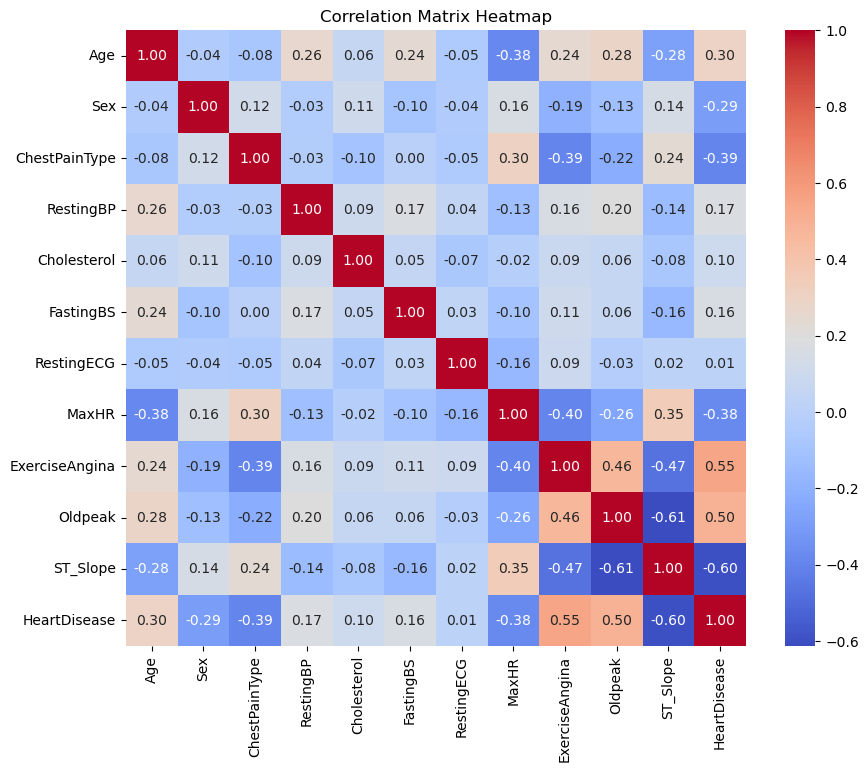

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"
df = pd.read_excel(file_path)

# Calculate correlation matrix
corr_matrix = df.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [5]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest

# Load dataset
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"
df = pd.read_excel(file_path)

# Define categorical features you want to test
categorical_features = ["Sex", "ChestPainType", "ExerciseAngina", "ST_Slope"]

# Target
y = df["HeartDisease"]

# One-hot encode categorical features
X = pd.get_dummies(df[categorical_features], drop_first=True)

# Run Chi-Square test
chi_scores, p_values = chi2(X, y)

# Put results in a dataframe
chi_results = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores,
    "p-value": p_values
}).sort_values(by="Chi2 Score", ascending=False)

print("Chi-Square Test Results for Categorical Features:")
print(chi_results)


Chi-Square Test Results for Categorical Features:
          Feature  Chi2 Score       p-value
2  ExerciseAngina  139.245975  3.891390e-32
1   ChestPainType  126.870328  1.983171e-29
3        ST_Slope   67.260450  2.379064e-16
0             Sex   48.581011  3.169231e-12


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# File path
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Assuming the last column is the target (change if needed)
X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # target

# Scale the features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define splits
splits = {
    "65/35": 0.35,
    "70/30": 0.30,
    "75/25": 0.25,
    "80/20": 0.20
}

results = []

for name, test_size in splits.items():
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=42, stratify=y
    )

    # Train an SVM model
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.append([name, acc, prec, rec, f1])

# Convert to DataFrame for nice display
results_df = pd.DataFrame(results, columns=["Split", "Accuracy", "Precision", "Recall", "F1-score"])
print(results_df)


   Split  Accuracy  Precision    Recall  F1-score
0  65/35  0.831418   0.833099  0.831418  0.831477
1  70/30  0.834821   0.836591  0.834821  0.834891
2  75/25  0.828877   0.831994  0.828877  0.828916
3  80/20  0.818792   0.822414  0.818792  0.818792


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# File path
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Assuming last column is the target (adjust if needed)
X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fixed 65/35 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

# Retrain SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print("=== SVM Model (70/30 Split) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")


=== SVM Model (70/30 Split) ===
Accuracy : 0.8348
Precision: 0.8366
Recall   : 0.8348
F1-score : 0.8349


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# File path
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Assuming last column is the target (adjust if needed)
X = df.iloc[:, :-1]  # features
y = df.iloc[:, -1]   # target

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fixed 65/35 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']       # Only relevant for rbf/poly
}

# GridSearchCV setup (5-fold cross-validation)
grid = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train with hyperparameter tuning
grid.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Retrain best model on training data
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate final tuned model
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n=== Tuned SVM Model (70/30 Split) ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.8675274725274725

=== Tuned SVM Model (70/30 Split) ===
Accuracy : 0.8527
Precision: 0.8555
Recall   : 0.8527
F1-score : 0.8527



=== Comparison of Untuned vs Tuned SVM (70/30 Split) ===
                   Model  Accuracy  Precision  Recall  F1-score
             Untuned SVM    0.8348     0.8366  0.8348    0.8349
Tuned SVM (GridSearchCV)    0.8527     0.8555  0.8527    0.8527


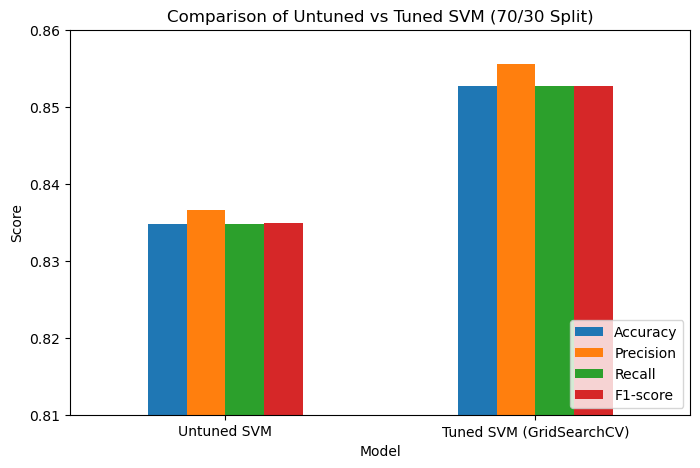

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Results from the user
results = {
    "Model": ["Untuned SVM", "Tuned SVM (GridSearchCV)"],
    "Accuracy": [0.8348, 0.8527],
    "Precision": [0.8366, 0.8555],
    "Recall": [0.8348, 0.8527],
    "F1-score": [0.8349, 0.8527]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Show table
print("\n=== Comparison of Untuned vs Tuned SVM (70/30 Split) ===")
print(results_df.to_string(index=False))

# Plot comparison
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(8, 5), rot=0, ylim=(0.81, 0.86)
)

plt.title("Comparison of Untuned vs Tuned SVM (70/30 Split)")
plt.ylabel("Score")
plt.legend(loc="lower right")
plt.show()


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# File path
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Features & target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scale features (important for KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 65/35 split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)

# Train KNN (k=5 as default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("=== KNN Model (70/30 Split) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred, average='weighted'):.4f}")


=== KNN Model (70/30 Split) ===
Accuracy : 0.8304
Precision: 0.8310
Recall   : 0.8304
F1-score : 0.8304


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# File path
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Features & target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 65/35 split (RF doesn’t need scaling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(
    n_estimators=100,   # number of trees
    random_state=42
)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("=== Random Forest Model (70/30 Split) ===")
print(f"Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall   : {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred, average='weighted'):.4f}")


=== Random Forest Model (70/30 Split) ===
Accuracy : 0.8393
Precision: 0.8455
Recall   : 0.8393
F1-score : 0.8391



=== Model Comparison (70/30 Split) ===
        Model  Accuracy  Precision   Recall  F1-score
          SVM  0.834821   0.836591 0.834821  0.834891
          KNN  0.830357   0.831049 0.830357  0.830438
Random Forest  0.839286   0.845524 0.839286  0.839106


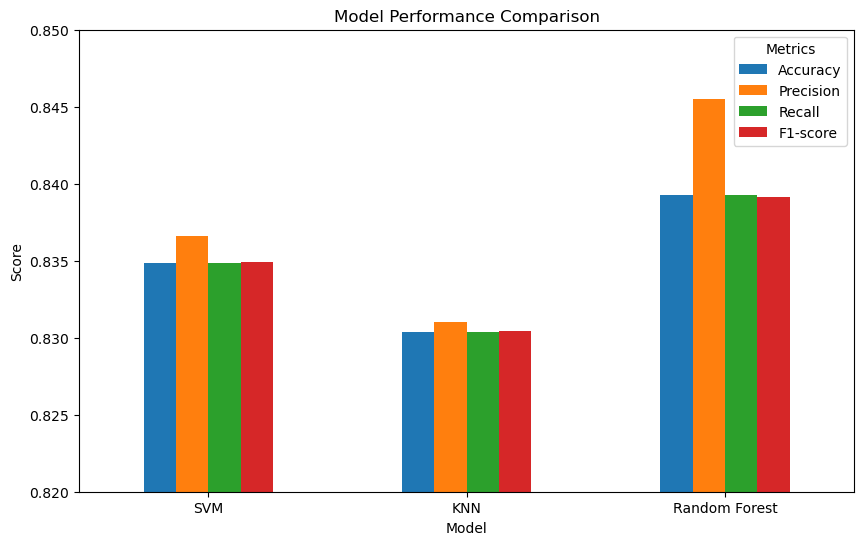

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# File path
file_path = r"C:\Users\user\OneDrive\Homeworks\AI\cleaned_heart.xlsx"

# Load dataset
df = pd.read_excel(file_path)

# Features & target (assuming last column is target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Scale for models that need it
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 65/35 split
X_train_s, X_test_s, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.30, random_state=42, stratify=y
)
X_train, X_test, _, _ = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Dictionary to store results
results = []

# --- 1. SVM ---
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_s, y_train)
y_pred = svm.predict(X_test_s)
results.append([
    "SVM",
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted')
])

# --- 2. KNN ---
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_s, y_train)
y_pred = knn.predict(X_test_s)
results.append([
    "KNN",
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted')
])

# --- 3. Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
results.append([
    "Random Forest",
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred, average='weighted'),
    recall_score(y_test, y_pred, average='weighted'),
    f1_score(y_test, y_pred, average='weighted')
])

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])

# Show table
print("\n=== Model Comparison (70/30 Split) ===")
print(results_df.to_string(index=False))

import matplotlib.pyplot as plt

# Plot histogram of scores
results_df.set_index("Model")[["Accuracy", "Precision", "Recall", "F1-score"]].plot(
    kind="bar", figsize=(10, 6)
)

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.82, 0.85)  # since metrics are between 0 and 1
plt.xticks(rotation=0)
plt.legend(title="Metrics")
plt.show()
